In [39]:
import pandas as pd
import matplotlib as plt
import numpy as np

In [40]:
df_qt = pd.read_csv('C:\\CS114\\qt-public.csv')

In [41]:
df_total = pd.read_csv('C:\\CS114\\annonimized.csv')

In [42]:
mssv_anon = set(df_total["concat('it001', username)"].dropna())
mssv_qt = set(df_qt['hash'].dropna())

In [43]:
mssv_chua_co_diem = mssv_anon - mssv_qt
print("Số mssv chưa có điểm quá trình:", len(mssv_chua_co_diem))

Số mssv chưa có điểm quá trình: 728


In [44]:
print("Ví dụ:", list(mssv_chua_co_diem)[:5])

Ví dụ: ['9eef5b76500d606c0ace08b9cd3ee9403e9e9664', 'aa1696aba3e93761b292c97c68bb0e06bb2f537d', 'a0ec1fa9ef85571c363b1ff524a7bccd583b0ee2', '88003ba023714648c4312658ad9a4b3703e56de0', 'faab34a8374299678ccf4eaa3628cdba3b65bfa6']


In [45]:
mssv_la_trong_qt = mssv_qt - mssv_anon
print("Số mssv có điểm nhưng không có bài nộp:", len(mssv_la_trong_qt))

Số mssv có điểm nhưng không có bài nộp: 0


In [46]:
df_qt.isna().sum()

hash      0
diemqt    6
dtype: int64

In [47]:
df_total.head()

,"concat('it001',`assignment_id`)","concat('it001',`problem_id`)","concat('it001', username)",is_final,status,pre_score,coefficient,"concat('it001',`language_id`)",created_at,updated_at,judgement
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."


In [48]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 11 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   concat('it001',`assignment_id`)  295198 non-null  object
 1   concat('it001',`problem_id`)     295198 non-null  object
 2   concat('it001', username)        295198 non-null  object
 3   is_final                         295198 non-null  int64 
 4   status                           295198 non-null  object
 5   pre_score                        295198 non-null  int64 
 6   coefficient                      295198 non-null  int64 
 7   concat('it001',`language_id`)    295198 non-null  object
 8   created_at                       295198 non-null  object
 9   updated_at                       295198 non-null  object
 10  judgement                        295198 non-null  object
dtypes: int64(3), object(8)
memory usage: 24.8+ MB


In [49]:
df_total['status'].unique()

array(['SCORE', 'Compilation Error', 'pending', 'Syntax Error'],
      dtype=object)

In [50]:
df_total = df_total.rename(columns={
    "concat('it001', username)": "mssv",
    "concat('it001',`assignment_id`)": "assignment_id",
    "concat('it001',`problem_id`)": "problem_id",
    "pre_score": "score",
    "coefficient": "late_coef",
    "created_at": "submit_time",
    "updated_at": "judge_time",
    "concat('it001',`language_id`)": "lang_id",
    "judgement": "judgement_json"
})

In [51]:
df_total

,assignment_id,problem_id,mssv,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0..."
...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func..."
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":..."
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0..."


In [52]:
# Xử lý cột trạng thái
df_total['code_runnable'] = (df_total['status'] == 'SCORE').astype(int)
df_total['compile_error'] = (df_total['status'] == 'Compilation Error').astype(int)
df_total['syntax_error'] = (df_total['status'] == 'Syntax Error').astype(int)
df_total['pending'] = (df_total['status'] == 'pending').astype(int)

In [53]:
df_total

,assignment_id,problem_id,mssv,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json,code_runnable,compile_error,syntax_error,pending
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:02:04,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,10-09 08:04:41,10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:06:49,10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 08:47:52,10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,10-09 09:19:35,10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:03:43,01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",1,0,0,0
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,01-15 16:04:07,01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",0,1,0,0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:04:58,01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",1,0,0,0
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,01-15 16:05:13,01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",1,0,0,0


In [54]:
# Chuyển cột thời gian sang kiểu datetime
# Vì dữ liệu không có năm, ta giả định năm 2024 để xử lý
df_total['submit_time'] = pd.to_datetime('2024-' + df_total['submit_time'], errors='coerce')
df_total['judge_time'] = pd.to_datetime('2024-' + df_total['judge_time'], errors='coerce')

In [55]:
df_total['testcase_passed_percent'] = (df_total['score'] / 100).astype(int)

In [56]:
df_total['lang_id'].unique()

array(['it0012', 'it0014', 'it0013', 'it0011', 'it0015', 'it0016'],
      dtype=object)

In [57]:
df_total

,assignment_id,problem_id,mssv,is_final,status,score,late_coef,lang_id,submit_time,judge_time,judgement_json,code_runnable,compile_error,syntax_error,pending,testcase_passed_percent
0,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,2024-10-09 08:02:04,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,0
1,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,SCORE,0,100,it0012,2024-10-09 08:04:41,2024-10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,0
2,90ce27571176d87961b565d5ef4b3de33ede04ac,789454427dd4097a14749e3dde63346b7a8d3811,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 08:06:49,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,100
3,90ce27571176d87961b565d5ef4b3de33ede04ac,bf96fbdc5f499538c3e2bfbec5779c8a14b0a9ff,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 08:47:52,2024-10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,100
4,90ce27571176d87961b565d5ef4b3de33ede04ac,7a6e5ca470ff47c3b5048f240c4738de71010c78,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,SCORE,10000,100,it0012,2024-10-09 09:19:35,2024-10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,388516cbf597351226be1bdbe5ef30b9dcef570f,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,2024-01-15 16:03:43,2024-01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",1,0,0,0,100
295194,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,0,Compilation Error,0,100,it0012,2024-01-15 16:04:07,2024-01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",0,1,0,0,0
295195,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,d2b96124ccb8e27b4b8dacdb935e729cb1ba546b,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,2024-01-15 16:04:58,2024-01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",1,0,0,0,100
295196,613aea04c978f5e72fffc8bcff1f7b695a63f7b1,8c0f8dd4ff55e1609f733e043ac5e88b1dde6e7c,232cce96362898f08e9150ba244adaf2d6583ab2,1,SCORE,10000,100,it0012,2024-01-15 16:05:13,2024-01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",1,0,0,0,100


In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
df_encoded = df_total.copy()

# Xóa cột 'status' gốc
df_encoded = df_encoded.drop(columns=['status'])

# Encode các cột ID chuỗi thành số nguyên
for col in ['assignment_id', 'problem_id', 'lang_id']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [60]:
df_encoded

,assignment_id,problem_id,mssv,is_final,score,late_coef,lang_id,submit_time,judge_time,judgement_json,code_runnable,compile_error,syntax_error,pending,testcase_passed_percent
0,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,0,100,1,2024-10-09 08:02:04,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,0
1,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,0,0,100,1,2024-10-09 08:04:41,2024-10-09 08:04:51,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,0
2,116,208,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,10000,100,1,2024-10-09 08:06:49,2024-10-09 08:06:58,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,100
3,116,335,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,10000,100,1,2024-10-09 08:47:52,2024-10-09 08:48:01,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,100
4,116,212,ed9eaeb6a707f50154024b24d7efcb874a9795dd,1,10000,100,1,2024-10-09 09:19:35,2024-10-09 09:19:45,"{""times"":[0,0,0,0,0,0,0,0,0,0],""mems"":[0,0,0,0...",1,0,0,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295193,76,97,232cce96362898f08e9150ba244adaf2d6583ab2,1,10000,100,1,2024-01-15 16:03:43,2024-01-15 16:03:53,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",1,0,0,0,100
295194,76,378,232cce96362898f08e9150ba244adaf2d6583ab2,0,0,100,1,2024-01-15 16:04:07,2024-01-15 16:05:08,"{""times"":[],""mems"":[],""verdicts"":{""\n\nIn func...",0,1,0,0,0
295195,76,378,232cce96362898f08e9150ba244adaf2d6583ab2,1,10000,100,1,2024-01-15 16:04:58,2024-01-15 16:05:08,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":...",1,0,0,0,100
295196,76,242,232cce96362898f08e9150ba244adaf2d6583ab2,1,10000,100,1,2024-01-15 16:05:13,2024-01-15 16:05:22,"{""times"":[0,0,0,0,0,0,0,0,0,0,0,0,0],""mems"":[0...",1,0,0,0,100


In [61]:
import json
import numpy as np

def extract_judgement_features(row):
    try:
        data = json.loads(row)
        times = data.get("times", [])
        mems = data.get("mems", [])
        failed = data.get("failed", [])

        n_tests = len(times)
        n_failed = len(failed)
        failed_ratio = n_failed / n_tests if n_tests > 0 else 0

        avg_time = np.mean(times) if times else 0
        max_time = np.max(times) if times else 0

        avg_mem = np.mean(mems) if mems else 0
        max_mem = np.max(mems) if mems else 0

        return pd.Series([n_tests, n_failed, failed_ratio, avg_time, max_time, avg_mem, max_mem])

    except:
        return pd.Series([0, 0, 0, 0, 0, 0, 0])

# Áp dụng trích xuất vào dataframe
df_encoded[['n_tests', 'n_failed', 'failed_ratio', 'avg_time', 'max_time', 'avg_mem', 'max_mem']] = df_encoded['judgement_json'].apply(extract_judgement_features)


In [62]:
df_encoded = df_encoded.drop(columns=['judgement_json'])

In [63]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295198 entries, 0 to 295197
Data columns (total 21 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   assignment_id            295198 non-null  int64         
 1   problem_id               295198 non-null  int64         
 2   mssv                     295198 non-null  object        
 3   is_final                 295198 non-null  int64         
 4   score                    295198 non-null  int64         
 5   late_coef                295198 non-null  int64         
 6   lang_id                  295198 non-null  int64         
 7   submit_time              295198 non-null  datetime64[ns]
 8   judge_time               295198 non-null  datetime64[ns]
 9   code_runnable            295198 non-null  int64         
 10  compile_error            295198 non-null  int64         
 11  syntax_error             295198 non-null  int64         
 12  pending         

In [64]:
df_encoded['max_mem'].unique()

array([   0., 1984., 2128., ..., 3380., 5672., 7640.], shape=(1696,))

In [65]:
print(df_encoded.isnull().sum().sort_values(ascending=False).head(10))

assignment_id    0
problem_id       0
mssv             0
is_final         0
score            0
late_coef        0
lang_id          0
submit_time      0
judge_time       0
code_runnable    0
dtype: int64


In [66]:
# Group theo mssv để tổng hợp
features_by_mssv = df_encoded.groupby('mssv').agg({
    'assignment_id': pd.Series.nunique,                 # Số assignment đã tham gia
    'problem_id': pd.Series.nunique,                    # Số bài đã làm
    'code_runnable': ['sum', 'mean'],                   # Tổng số bài chạy được và tỷ lệ
    'testcase_passed_percent': 'mean',                  # Trung bình testcase đúng
    'late_coef': 'mean',                                # Trung bình hệ số trễ
    'n_failed': 'mean',                                 # Trung bình số test case sai
    'failed_ratio': 'mean',                             # Tỷ lệ test case sai trung bình
    'avg_time': ['mean', 'max'],                        # Trung bình + max thời gian chạy
    'avg_mem': ['mean', 'max'],                         # Trung bình + max bộ nhớ
    'lang_id': pd.Series.nunique,                       # Số ngôn ngữ đã dùng
    'compile_error': 'sum',                             # Tổng lần bị compile error
    'syntax_error': 'sum'                               # Tổng lần bị syntax error
})

# Đặt lại tên cột cho dễ hiểu
features_by_mssv.columns = [
    'n_assignments', 'n_problems', 
    'n_code_runnable', 'code_runnable_ratio', 
    'avg_testcase_passed', 'avg_late_coef', 
    'avg_n_failed', 'avg_failed_ratio', 
    'avg_time', 'max_time',
    'avg_mem', 'max_mem',
    'n_lang_used', 'n_compile_error', 'n_syntax_error'
]

# Reset index để mssv là cột
features_by_mssv = features_by_mssv.reset_index()

# Kiểm tra kết quả
print(features_by_mssv.head())


                                       mssv  n_assignments  n_problems  \
0  00b6dd4fc7eb817e03708c532016ef30ce564a61              7          46   
1  00bef8afee8f3c595d535c9c03c490cac1a4f021              9          78   
2  01122b3ef7e59b84189e65985305f575d6bdf83c              7          66   
3  0134f9f410c65ad0e8c2254a7e9288670e02a183              4          47   
4  013de369c439ab0ead8aa7da64423aa395a8be39              8          52   

   n_code_runnable  code_runnable_ratio  avg_testcase_passed  avg_late_coef  \
0              119             0.809524            54.931973     100.000000   
1              209             0.806950            54.818533     100.000000   
2              175             0.897436            59.620513     100.000000   
3               76             0.760000            59.510000     100.000000   
4               94             0.878505            64.663551      97.196262   

   avg_n_failed  avg_failed_ratio  avg_time  max_time     avg_mem  \
0          

In [67]:
df_qt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hash    761 non-null    object
 1   diemqt  755 non-null    object
dtypes: object(2)
memory usage: 12.0+ KB


In [68]:
df_qt.rename(columns={'hash': 'mssv'}, inplace=True)

In [69]:
df_qt['diemqt'] = pd.to_numeric(df_qt['diemqt'], errors='coerce')

In [ ]:
#df_qt = df_qt.dropna(subset=['diemqt'])

In [70]:
df_qt.isna().sum()

mssv      0
diemqt    7
dtype: int64

In [71]:
df_merged = features_by_mssv.merge(df_qt, on='mssv', how='left')

In [72]:
df_merged.head()

,mssv,n_assignments,n_problems,n_code_runnable,code_runnable_ratio,avg_testcase_passed,avg_late_coef,avg_n_failed,avg_failed_ratio,avg_time,max_time,avg_mem,max_mem,n_lang_used,n_compile_error,n_syntax_error,diemqt
0,00b6dd4fc7eb817e03708c532016ef30ce564a61,7,46,119,0.809524,54.931973,100.000000,0.0,0.0,0.013624,0.510769,91.583424,1818.666667,1,28,0,7.5
1,00bef8afee8f3c595d535c9c03c490cac1a4f021,9,78,209,0.806950,54.818533,100.000000,0.0,0.0,0.010982,0.606154,172.903711,1984.000000,1,50,0,7.0
2,01122b3ef7e59b84189e65985305f575d6bdf83c,7,66,175,0.897436,59.620513,100.000000,0.0,0.0,0.017795,0.524000,186.855543,10200.000000,1,20,0,9.0
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,4,47,76,0.760000,59.510000,100.000000,0.0,0.0,0.006643,0.534000,39.750857,1984.000000,1,24,0,NaN
4,013de369c439ab0ead8aa7da64423aa395a8be39,8,52,94,0.878505,64.663551,97.196262,0.0,0.0,0.031732,0.803571,186.571709,1785.600000,1,13,0,10.0


In [73]:
df_merged.isna().sum()

mssv                     0
n_assignments            0
n_problems               0
n_code_runnable          0
code_runnable_ratio      0
avg_testcase_passed      0
avg_late_coef            0
avg_n_failed             0
avg_failed_ratio         0
avg_time                 0
max_time                 0
avg_mem                  0
max_mem                  0
n_lang_used              0
n_compile_error          0
n_syntax_error           0
diemqt                 735
dtype: int64

In [ ]:
df_need_predict = df_merged[df_merged['diemqt'].isna()]


Số dòng cần dự đoán: 735
Số mssv duy nhất cần dự đoán: 735


In [79]:
train_df = df_merged

In [80]:
train_df = df_merged[df_merged['diemqt'].notna()]
test_df = df_merged[df_merged['diemqt'].isna()]

In [82]:
X_train = train_df.drop(columns=['mssv', 'diemqt'])
y_train = train_df['diemqt']

X_test = test_df.drop(columns=['mssv', 'diemqt'])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train, y_train)

# Đánh giá nhanh trên tập huấn luyện
y_pred_train = model.predict(X_train)
print("R^2 score trên tập huấn luyện:", r2_score(y_train, y_pred_train))

R^2 score trên tập huấn luyện: 0.09956462389123932


In [84]:
test_df['diemqt'] = model.predict(X_test)

C:\Users\MrBeast\AppData\Local\Temp\ipykernel_14004\430897607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['diemqt'] = model.predict(X_test)


In [85]:
submission = test_df[['mssv', 'diemqt']]
submission[['mssv', 'diemqt']].to_csv('submission.csv', index=False, header=False, encoding='utf-8')

In [86]:
submission.head()

,mssv,diemqt
3,0134f9f410c65ad0e8c2254a7e9288670e02a183,8.032632
20,035f97702f2c01d26ab1fae8f39ea2f98a0caa3c,7.913406
40,06024da8147b5cf6105beb4c403f67cf1ff0aea1,9.948155
68,0aaebc88f6106684d6993c156104c1ef36cf94e0,8.271211
80,0bf111a9caedf02804f6991792490e63bc21058a,8.523878


In [87]:
# Kiểm tra số dòng bạn sắp nộp
print("Số dòng trong submission:", len(submission))

# Số mã số sinh viên không trùng
print("Số mssv duy nhất:", submission['mssv'].nunique())

# Có dòng nào thiếu điểm không?
print("Số dòng thiếu điểm:", submission['diemqt'].isna().sum())

Số dòng trong submission: 735
Số mssv duy nhất: 735
Số dòng thiếu điểm: 0


In [88]:
df_merged['diemqt'].unique()

array([ 7.5,  7. ,  9. ,  nan, 10. ,  8. ,  9.5,  6.5,  8.5,  6. ,  4.5,
        5. ,  1.5,  5.5,  0. ,  1. ,  2.5,  2. ,  3.5,  4. ,  3. ])

In [91]:
import joblib

joblib.dump(model, 'best_model.pkl')

['best_model.pkl']

In [ ]:
import joblib

# Nạp file mô hình
model = joblib.load('best_model.pkl')

# In ra mô hình
print(model)

# Xem các tham số mô hình
print(model.get_params())

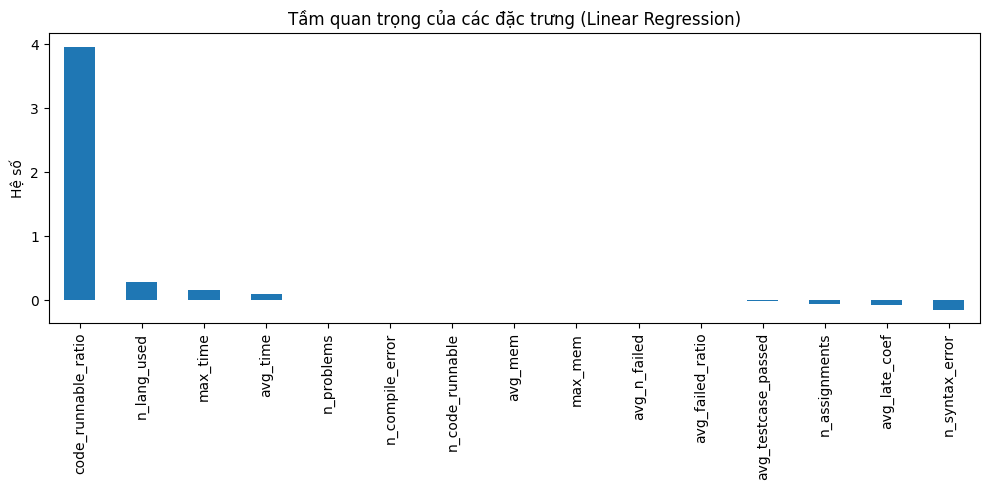

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Giả sử X_train là DataFrame
feature_importance = pd.Series(model.coef_, index=X_train.columns)

# Vẽ biểu đồ
feature_importance.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))
plt.title('Tầm quan trọng của các đặc trưng (Linear Regression)')
plt.ylabel('Hệ số')
plt.tight_layout()
plt.show()